In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.rc('figure', figsize=(10,7))
plt.rcParams["patch.force_edgecolor"] = True

#### Basic DataFrame operations

    df.head()
    df.tail()
    df.index
    df.columns
    df.shape
    df.info()
    df.describe()
    df.dtypes
    df.values

***`np.log10()`*** gives logarithmic values to the base 10!

In [3]:
np.log10([10, 100, 1000])

array([ 1.,  2.,  3.])

You can directly apply Numpy functions to entire DataFrames without converting them to Numpy array first (this is probably because Pandas as built on top of Numpy).

In [4]:
dt = {'Total Population': {1960: 3034970564.0,
  1970: 3684822701.0,
  1980: 4436590356.0,
  1990: 5282715991.0,
  2000: 6115974486.0,
  2010: 6924282937.0}}
df = pd.DataFrame(dt)
df

,Total Population
1960,3.034971e+09
1970,3.684823e+09
1980,4.436590e+09
1990,5.282716e+09
2000,6.115974e+09
2010,6.924283e+09


In [5]:
print(np.log10(df.values))
print(type(np.log10(df.values)))

[[ 9.48215448]
 [ 9.5664166 ]
 [ 9.64704933]
 [ 9.72285726]
 [ 9.78646566]
 [ 9.84037481]]
<class 'numpy.ndarray'>


In [6]:
print(np.log10(df))
print(type(np.log10(df)))

      Total Population
1960          9.482154
1970          9.566417
1980          9.647049
1990          9.722857
2000          9.786466
2010          9.840375
<class 'pandas.core.frame.DataFrame'>


#### Building DataFrames from scratch

- We have already seen how to build DataFrames from ***`pd.read_csv()`***
- We have also seen how to build DataFrames from Python Dictionaries
- Build DataFrames from Python Lists and eventually Tuples
  - Suppose you have individual lists
  - You then need to introduce 2 lists that contain columns names and a list that contains all the lists comprising of data ie. a list of lists
  - You can then zip the above two lists
  - use ***`list()`*** on the outer of zip
  - Use ***`dict()`*** on the outer of list
  - then convert this to a DataFrame using the traditional methods
  - for example...

In [7]:
# Given
list_a = [1,2,3]
list_b = ['Hello', 'World', 'Something']
list_c = [7,8,9]

In [9]:
list_col = ['A', 'B', 'C']
list_vals = [list_a, list_b, list_c]
pd.DataFrame(dict(list(zip(list_col, list_vals))))

,A,B,C
0,1,Hello,7
1,2,World,8
2,3,Something,9


In [17]:
# The reason the above works is because 
list(zip(list_col, list_vals)) # gives us...

[('A', [1, 2, 3]), ('B', ['Hello', 'World', 'Something']), ('C', [7, 8, 9])]

In [19]:
# and 
dict(list(zip(list_col, list_vals))) # gives us..
# which means you convert two values tuples directly to dictionaries!

{'A': [1, 2, 3], 'B': ['Hello', 'World', 'Something'], 'C': [7, 8, 9]}

#### Broadcasting

- Basically means how we can extrpolate values to the entire DataFrame

In [20]:
df

,Total Population
1960,3.034971e+09
1970,3.684823e+09
1980,4.436590e+09
1990,5.282716e+09
2000,6.115974e+09
2010,6.924283e+09


In [21]:
df['New_Column'] = np.nan
df

,Total Population,New_Column
1960,3.034971e+09,NaN
1970,3.684823e+09,NaN
1980,4.436590e+09,NaN
1990,5.282716e+09,NaN
2000,6.115974e+09,NaN
2010,6.924283e+09,NaN


Here, we basically ***broadcasted*** Not-A-Number to the entire DataFrame by a single assignment. This saves time!

Another example of broadcasting...

In [22]:
heights = [56.4, 78.5, 89.2, 95.2, 35.7]
data = {'heights': heights, 'sex': 'M'}
results = pd.DataFrame(data)
results

,heights,sex
0,56.4,M
1,78.5,M
2,89.2,M
3,95.2,M
4,35.7,M


Here we ***broadcasted*** the gender 'M' to the entire DataFrame!

Of course we change column names and row indices by:

    df.index = [list of row indices]
    df.columns = [list of column names]

### Importing and Exporting Data

- http://sidc.be/silso/infossntotdaily has csv about Sunspot Data
- ***`pd.read_csv()`*** parameters
  - `header=None` when there are no headers and we don't want the first row to be roecorded as column names
    - You are telling pandas what line is your header line, by passing False this evaluates to 0 which is why it reads in the first line as the header as expected, when you pass True it evaluates to 1 so it reads the second line, if you passed None then it thinks there is no header row and will auto generate ordinal values.
    - For example: if a csv already has a structure like:
    
    *Year,Total Population*
    
    *1960,3034970564.0*
    
    *1970,3684822701.0*
    
    *1980,4436590356.0*
    
    *1990,5282715991.0*
    
    *2000,6115974486.0*
    
    *2010,6924282937.0*
    
    - ***`pd.read_csv('world_population.csv', header=0, names=['year', 'pop'])`***
    will give you ->
   
       *year          pop*
    
    *0  1960  3.034971e+09*
    
    *1  1970  3.684823e+09*
    
    *2  1980  4.436590e+09*
    
    *3  1990  5.282716e+09*
    
    *4  2000  6.115974e+09*
    
    *5  2010  6.924283e+09*
    
    - whereas ***`pd.read_csv('world_population.csv', header=None, names=['year', 'pop'])`***
    will give you ->
    
       *year               pop*
    
    *0  Year  Total Population*
    
    *1  1960      3034970564.0*
    
    *2  1970      3684822701.0*
    
    *3  1980      4436590356.0*
    
    *4  1990      5282715991.0*
    
    *5  2000      6115974486.0*
    
    *6  2010      6924282937.0*
    
  - `names=[List of column names]` if we want the columns to be named within the function itself
  - `sep=',' or '\t' or '\n'` (Note sep and delimited parameters are same)
  - `comment=`
  - `na_values=something` to be encoded as NaN values!
    - You can also parse specific columns for their Null values by passing a Dictionary
    - ***`pd.read_csv(...., na_values={'column_name':[list of values that you want to be encoded as columns]`***
    - Note that if you did not want to specify some column name above, you could have just used a list of strings to be encoded as NaN or just a single string depending on the use case
  - `chunksize=`
  - `parse_dates=[[0, 1, 2, ...]]` 
    - ***`parse_dates`*** parses date intelligently
    - Note that you have to pass a list of list of columns
  - `index_col='column_name'` -> This will conevrt some particular column to row indices

##### Exporting Data

- ***`df.to_csv('filename.csv', index=False)`***
- ***`df.to_csv('filename.tsv', sep='\t', index=False)`*** to convert to TSV
- ***`df.to_excel('filename.xlsx', index=False)`*** to conver to Excel Spreadsheet

### Plotting with pandas

- Pandas plot method has more and nicer formatting (like axes labels and legends) as compared to plt.plot(Series) and plt.plot(Numpy array)
- Pandas plot method can be applied to entire DataFrames!
- df.plot() will plot ***all*** columns against the row indices on the x-axis (in the same plot)!
  - if you add the parameter ***`subplot=True`*** here, you'll see the graphs in different plots
- Pandas plot() method arguments
  - `x='column_name'`
  - `y='column_name'`
  - `color`
  - `style= '.-' or '.'`
  - `legend=True`
  
- Saving Plots
  - ***`plt.savefig('filename.png or filename.jpg or filename.pdf')`***

In [25]:
dt = {'Temperature (deg F)': {0: 79.0,
  1: 77.400000000000006,
  2: 76.400000000000006,
  3: 75.700000000000003,
  4: 75.099999999999994,
  5: 74.599999999999994,
  6: 74.5,
  7: 76.0,
  8: 79.799999999999997,
  9: 83.299999999999997,
  10: 86.599999999999994,
  11: 89.299999999999997,
  12: 91.599999999999994,
  13: 93.200000000000003,
  14: 94.400000000000006,
  15: 95.0,
  16: 94.799999999999997,
  17: 93.900000000000006,
  18: 92.400000000000006,
  19: 89.900000000000006,
  20: 86.099999999999994,
  21: 83.599999999999994,
  22: 81.799999999999997,
  23: 80.0,
  24: 79.099999999999994,
  25: 77.400000000000006,
  26: 76.5,
  27: 75.799999999999997,
  28: 75.200000000000003,
  29: 74.599999999999994,
  30: 74.599999999999994,
  31: 76.099999999999994,
  32: 79.799999999999997,
  33: 83.299999999999997,
  34: 86.5,
  35: 89.400000000000006,
  36: 91.599999999999994,
  37: 93.200000000000003,
  38: 94.400000000000006,
  39: 95.0,
  40: 94.799999999999997,
  41: 93.900000000000006,
  42: 92.400000000000006,
  43: 89.799999999999997,
  44: 86.099999999999994,
  45: 83.599999999999994,
  46: 81.799999999999997,
  47: 80.099999999999994,
  48: 79.099999999999994,
  49: 77.5}}
df = pd.DataFrame(dt)
df.head(10)

,Temperature (deg F)
0,79.0
1,77.4
2,76.4
3,75.7
4,75.1
5,74.6
6,74.5
7,76.0
8,79.8
9,83.3


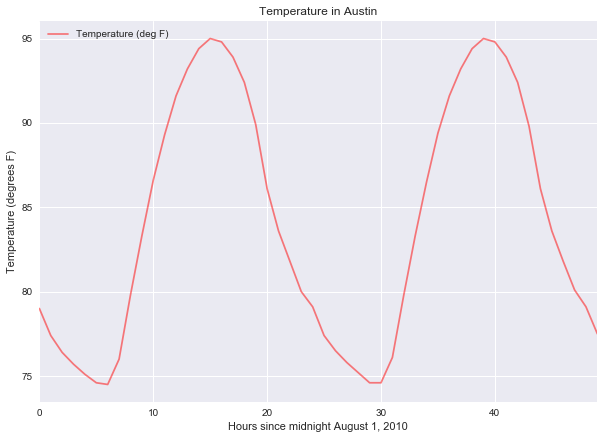

In [29]:
df.plot(color='red', alpha=0.5)
plt.title('Temperature in Austin')
plt.xlabel('Hours since midnight August 1, 2010')
plt.ylabel('Temperature (degrees F)')
plt.show()

In [30]:
# The data has been taken from a DataFrame by df.sample(50).to_dict()
dt = {'Dew Point (deg F)': {2: 71.299999999999997,
  8: 72.799999999999997,
  19: 67.700000000000003,
  20: 68.599999999999994,
  27: 71.400000000000006,
  49: 71.200000000000003,
  85: 68.299999999999997,
  90: 66.599999999999994,
  101: 71.299999999999997,
  106: 71.099999999999994,
  118: 70.0,
  138: 66.599999999999994,
  144: 70.599999999999994,
  189: 69.400000000000006,
  190: 69.900000000000006,
  201: 72.200000000000003,
  209: 67.0,
  222: 71.0,
  226: 71.200000000000003,
  228: 69.200000000000003,
  256: 67.0,
  262: 69.900000000000006,
  278: 67.799999999999997,
  302: 67.799999999999997,
  340: 71.200000000000003,
  347: 70.299999999999997,
  363: 71.299999999999997,
  394: 71.400000000000006,
  446: 67.900000000000006,
  451: 68.099999999999994,
  461: 71.0,
  479: 70.400000000000006,
  484: 71.099999999999994,
  524: 68.700000000000003,
  537: 72.099999999999994,
  547: 67.799999999999997,
  548: 68.599999999999994,
  569: 66.799999999999997,
  614: 67.599999999999994,
  617: 66.799999999999997,
  621: 69.099999999999994,
  656: 71.700000000000003,
  664: 66.700000000000003,
  667: 67.700000000000003,
  668: 68.400000000000006,
  678: 69.799999999999997,
  701: 69.700000000000003,
  704: 71.299999999999997,
  710: 67.299999999999997,
  737: 66.299999999999997},
 'Pressure (atm)': {2: 1.0,
  8: 1.0,
  19: 1.0,
  20: 1.0,
  27: 1.0,
  49: 1.0,
  85: 1.0,
  90: 1.0,
  101: 1.0,
  106: 1.0,
  118: 1.0,
  138: 1.0,
  144: 1.0,
  189: 1.0,
  190: 1.0,
  201: 1.0,
  209: 1.0,
  222: 1.0,
  226: 1.0,
  228: 1.0,
  256: 1.0,
  262: 1.0,
  278: 1.0,
  302: 1.0,
  340: 1.0,
  347: 1.0,
  363: 1.0,
  394: 1.0,
  446: 1.0,
  451: 1.0,
  461: 1.0,
  479: 1.0,
  484: 1.0,
  524: 1.0,
  537: 1.0,
  547: 1.0,
  548: 1.0,
  569: 1.0,
  614: 1.0,
  617: 1.0,
  621: 1.0,
  656: 1.0,
  664: 1.0,
  667: 1.0,
  668: 1.0,
  678: 1.0,
  701: 1.0,
  704: 1.0,
  710: 1.0,
  737: 1.0},
 'Temperature (deg F)': {2: 76.400000000000006,
  8: 79.799999999999997,
  19: 89.900000000000006,
  20: 86.099999999999994,
  27: 75.799999999999997,
  49: 77.5,
  85: 93.400000000000006,
  90: 92.5,
  101: 74.700000000000003,
  106: 86.599999999999994,
  118: 81.799999999999997,
  138: 92.5,
  144: 79.200000000000003,
  189: 83.299999999999997,
  190: 81.700000000000003,
  201: 83.299999999999997,
  209: 94.099999999999994,
  222: 74.599999999999994,
  226: 86.400000000000006,
  228: 91.700000000000003,
  256: 94.700000000000003,
  262: 81.599999999999994,
  278: 94.400000000000006,
  302: 94.400000000000006,
  340: 75.299999999999997,
  347: 89.099999999999994,
  363: 75.900000000000006,
  394: 86.299999999999997,
  446: 94.299999999999997,
  451: 88.900000000000006,
  461: 74.799999999999997,
  479: 80.200000000000003,
  484: 75.299999999999997,
  524: 85.400000000000006,
  537: 82.900000000000006,
  547: 88.299999999999997,
  548: 85.200000000000003,
  569: 93.5,
  614: 93.599999999999994,
  617: 93.0,
  621: 82.599999999999994,
  656: 78.700000000000003,
  664: 93.299999999999997,
  667: 87.099999999999994,
  668: 84.099999999999994,
  678: 73.799999999999997,
  701: 73.700000000000003,
  704: 78.299999999999997,
  710: 92.799999999999997,
  737: 91.900000000000006}}
df = pd.DataFrame(dt)
df.head()

,Dew Point (deg F),Pressure (atm),Temperature (deg F)
2,71.3,1.0,76.4
8,72.8,1.0,79.8
19,67.7,1.0,89.9
20,68.6,1.0,86.1
27,71.4,1.0,75.8


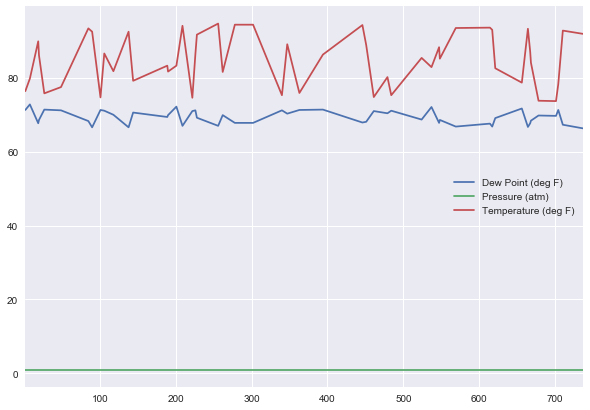

In [31]:
# Plot the entire DataFrame in one plot
df.plot()
plt.show()

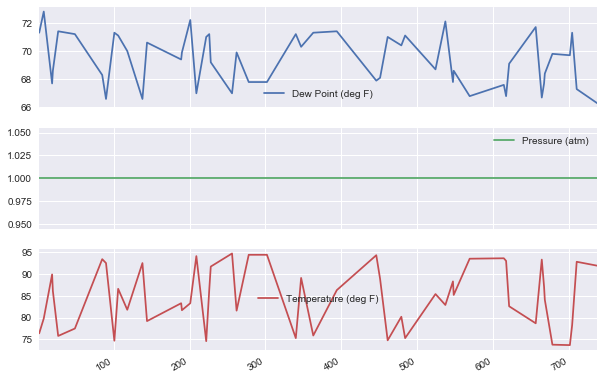

In [32]:
# Plot the entire DataFrame in different plots
df.plot(subplots=True)
plt.show()

In [40]:
from sklearn.datasets import load_iris

In [42]:
iris = load_iris()

In [52]:
numpy_2d = iris.data
print(numpy_2d[0:5, :])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [51]:
df = pd.DataFrame(numpy_2d, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Note that this proves that Numpy 2d arrays with a proper structure can be directly converted to DataFrames!

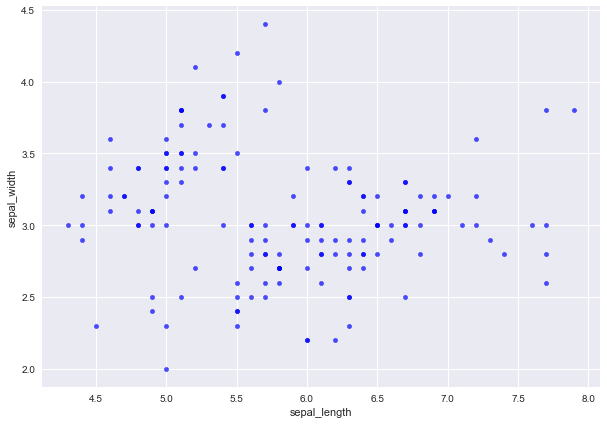

In [59]:
# Use Pandas plot method on this DataFrame to prine sepal_length vs sepal_width
df.plot(x='sepal_length', y='sepal_width', kind='scatter', alpha=0.7, color='blue', style='.')
plt.show()

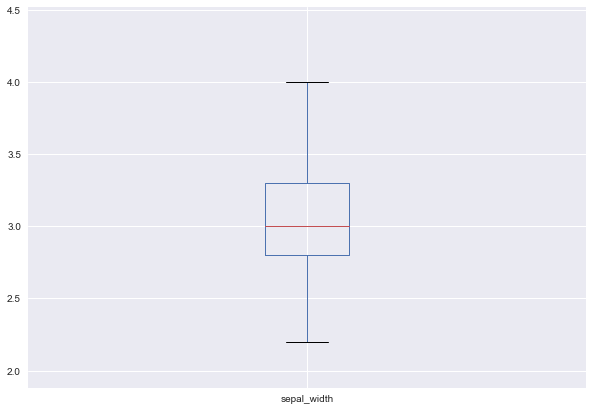

In [62]:
# Use Pandas plot method to plot a Box Plot of sepal_width
df.plot(y='sepal_width', kind='box')
plt.show()

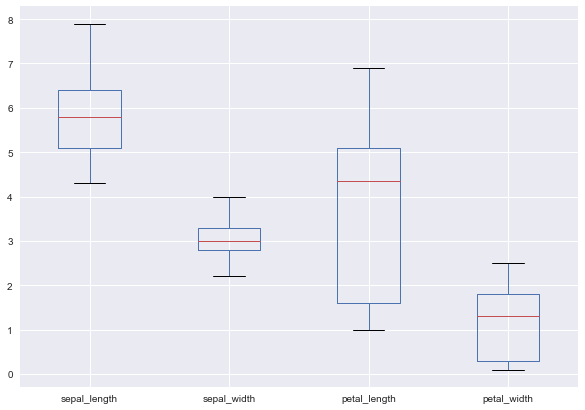

In [63]:
# Use Pandas plot method to plot Box Plots of the entire DataFrame
df.plot(kind='box')
plt.show()

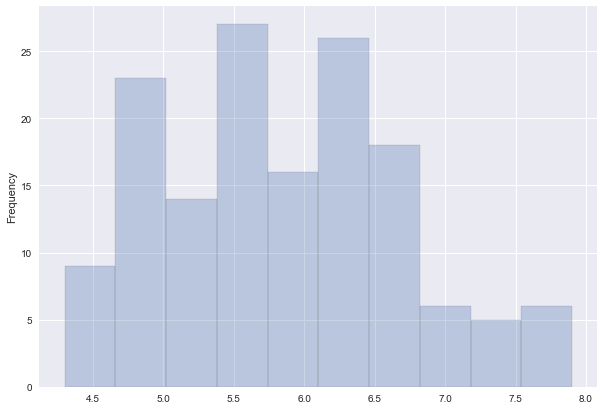

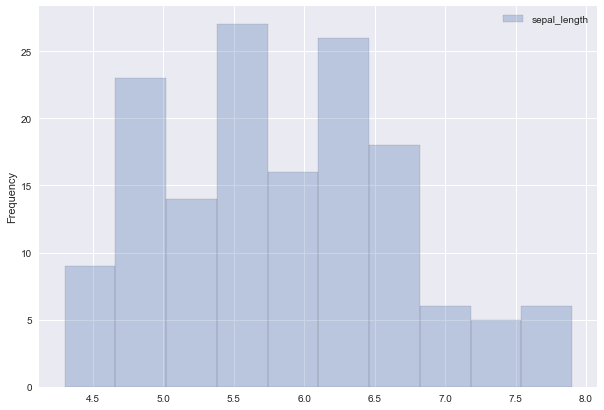

In [76]:
# Use Pandas plot method to plot Histogram of sepal_length

# Method 1
df['sepal_length'].plot(kind='hist', alpha=0.3)
plt.show()

# Method 2
df.plot(y='sepal_length', kind='hist', alpha=0.3)
plt.show()

#### Histogram Options

- bins (integer): number of intervals or bins
- range (tuple): extrema of bins (minimum, maximum)
- normed (boolean): whether to normalize to one
- cumulative (boolean): compute Cumulative Distribution
Function (CDF)
- … more Matplotlib customizations (Any matplotlib options can be used as parameters in the Pandas plot method!)

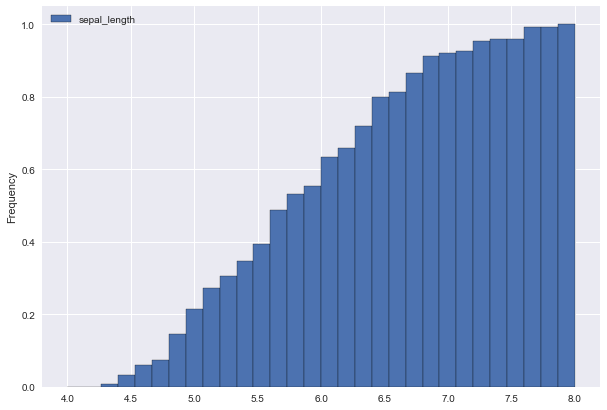

In [75]:
# Plot cdf of the normalized histogram of sepal_length where range=(4,8) and bins=30
df.plot(y='sepal_length', kind='hist', bins=30, range=(4,8), normed=True, cumulative=True)
plt.show()

In [77]:
# Plotting multiple columns of a DataFrame on the y-axis and against a singular x-axis
dt = {'AAPL': {0: 117.160004,
  1: 128.46000700000002,
  2: 124.43000000000001,
  3: 125.150002,
  4: 130.279999,
  5: 125.43000000000001,
  6: 121.300003,
  7: 112.760002,
  8: 110.300003,
  9: 119.5,
  10: 118.300003,
  11: 105.260002},
 'GOOG': {0: 534.52244500000018,
  1: 558.402511,
  2: 548.00246800000002,
  3: 537.34002699999996,
  4: 532.10998499999982,
  5: 520.51000999999997,
  6: 625.60998499999982,
  7: 618.25,
  8: 608.419983,
  9: 710.80999800000018,
  10: 742.59997599999997,
  11: 758.88000499999998},
 'IBM': {0: 153.30999800000001,
  1: 161.94000199999999,
  2: 160.5,
  3: 171.28999299999995,
  4: 169.64999399999999,
  5: 162.66000399999999,
  6: 161.990005,
  7: 147.88999899999999,
  8: 144.970001,
  9: 140.08000200000001,
  10: 139.41999799999999,
  11: 137.61999499999999},
 'Month': {0: 'Jan',
  1: 'Feb',
  2: 'Mar',
  3: 'Apr',
  4: 'May',
  5: 'Jun',
  6: 'Jul',
  7: 'Aug',
  8: 'Sep',
  9: 'Oct',
  10: 'Nov',
  11: 'Dec'}}
df = pd.DataFrame(dt)
df

,AAPL,GOOG,IBM,Month
0,117.160004,534.522445,153.309998,Jan
1,128.460007,558.402511,161.940002,Feb
2,124.430000,548.002468,160.500000,Mar
3,125.150002,537.340027,171.289993,Apr
4,130.279999,532.109985,169.649994,May
5,125.430000,520.510010,162.660004,Jun
6,121.300003,625.609985,161.990005,Jul
7,112.760002,618.250000,147.889999,Aug
8,110.300003,608.419983,144.970001,Sep
9,119.500000,710.809998,140.080002,Oct


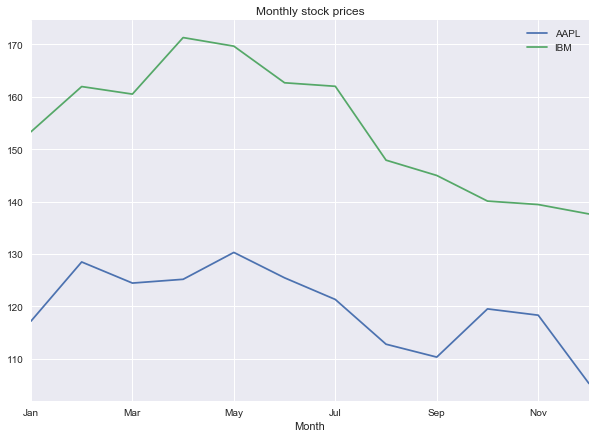

In [78]:
df.plot(x='Month', y=['AAPL', 'IBM'])
plt.title('Monthly stock prices')
plt.show()

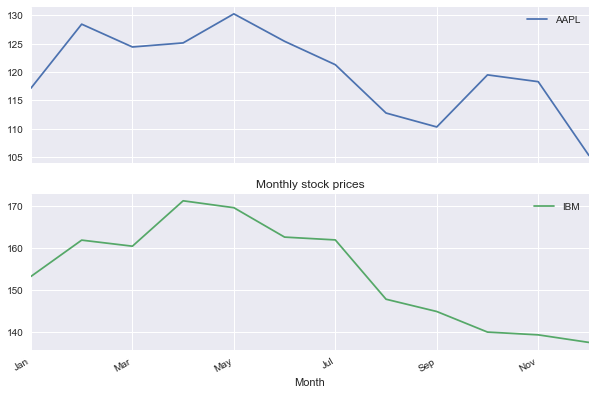

In [79]:
# Plot the above graph in different axes
df.plot(x='Month', y=['AAPL', 'IBM'], subplots=True)
plt.title('Monthly stock prices')
plt.show()

Remember, when plotting the PDF, you need to specify normed=True in your call to .hist(), and when plotting the CDF, you need to specify cumulative=True in addition to normed=True.

In [81]:
# Load the tips dataset from seaborn
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [92]:
tips['fraction'] = tips['tip']/tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


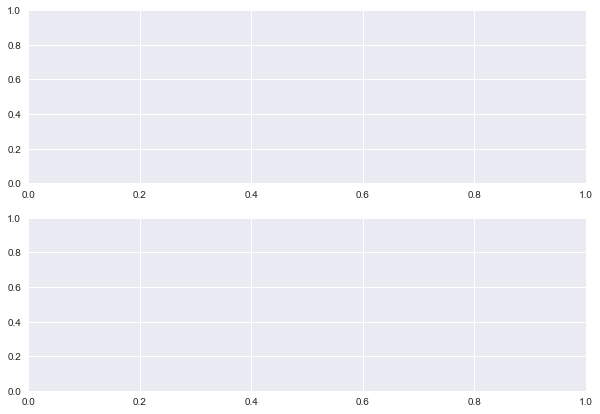

In [95]:
# See what the plt.subplots() function does?
fig, axes = plt.subplots(nrows=2, ncols=1)

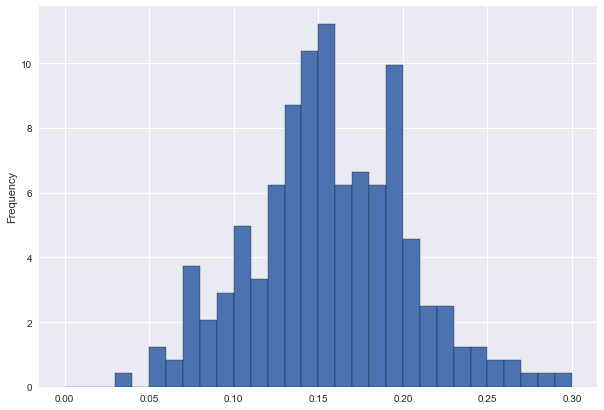

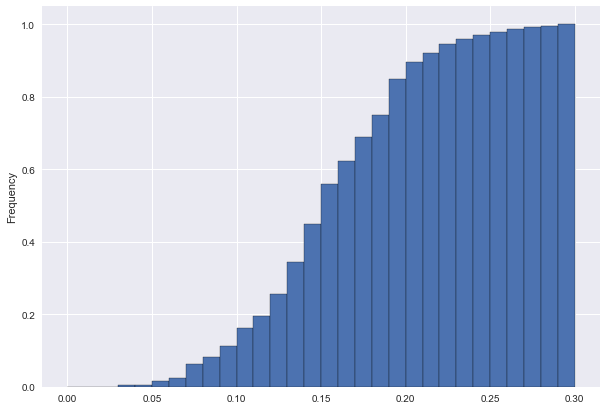

In [110]:
# Plot a PDF and CDF for the fraction column of the tips dataset.
# Plot a PDF for the values in fraction with 30 bins between 0 and 30%.
tips['fraction'].plot(kind='hist', bins=30, range=(0, 0.3), normed=True)
plt.show()

# Plot a CDF
tips['fraction'].plot(kind='hist', bins=30, range=(0, 0.3), normed=True, cumulative=True)
plt.show()

### Statistical Exploratory Data Analysis

- Series.mean() and Series.count() gives you results ignorning Nulls
- DataFrame.mean() and DataFrame.count() will give you means and counts of every column ignoring Nulls
- 

In [116]:
data = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [117]:
data.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [118]:
data.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
dtype: int64

In [119]:
data['sepal_length'].mean()

5.843333333333335

In [121]:
data.std() # Measures Standard Deviation of the non-Null entries

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

In [122]:
data.median() # Measures median

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [123]:
data.quantile(0.5) # is the same as Median

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64

In [128]:
data.quantile(0.25) # is the same as the 25th percentile; Remember that quantiles are also colloquially called percentiles

sepal_length    5.1
sepal_width     2.8
petal_length    1.6
petal_width     0.3
Name: 0.25, dtype: float64

In [125]:
data.quantile(0.75) # is the same as 75th percentile

sepal_length    6.4
sepal_width     3.3
petal_length    5.1
petal_width     1.8
Name: 0.75, dtype: float64

In [126]:
data.quantile(0.75) - data.quantile(0.25) # is the IQR

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64

In [129]:
# You can also do the above by
data.quantile([0.25, 0.75])

,sepal_length,sepal_width,petal_length,petal_width
0.25,5.1,2.8,1.6,0.3
0.75,6.4,3.3,5.1,1.8


In [130]:
data.min()

sepal_length    4.3
sepal_width     2.0
petal_length    1.0
petal_width     0.1
dtype: float64

In [131]:
data.max()

sepal_length    7.9
sepal_width     4.4
petal_length    6.9
petal_width     2.5
dtype: float64

In [142]:
labels = pd.Series(iris.target_names)
labels

0        setosa
1    versicolor
2     virginica
dtype: object

In [143]:
labels.unique() # will give you the unique values of a series

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [144]:
# can also do value_counts above
labels.value_counts(dropna=False)

virginica     1
versicolor    1
setosa        1
dtype: int64

In [178]:
data.index = ['setosa' for _ in range(50)] + ['versicolor' for _ in range(50)] + ['virginica' for _ in range(50)]
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width
setosa,5.0,3.4,1.6,0.4
virginica,6.0,2.2,5.0,1.5
setosa,5.0,3.3,1.4,0.2
setosa,5.0,3.2,1.2,0.2
setosa,5.2,3.5,1.5,0.2
versicolor,5.9,3.2,4.8,1.8
setosa,5.3,3.7,1.5,0.2
setosa,5.2,3.4,1.4,0.2
setosa,4.4,3.0,1.3,0.2
setosa,4.7,3.2,1.6,0.2


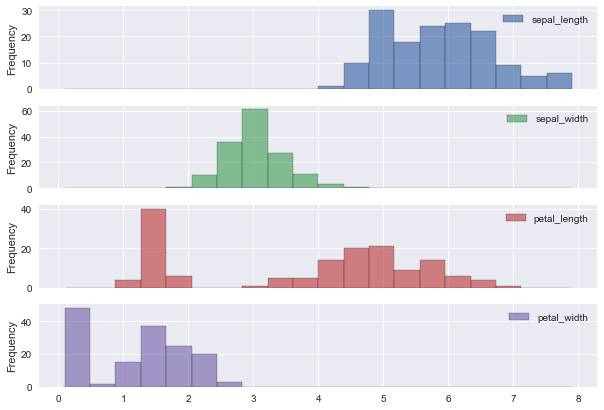

In [190]:
data.plot(kind='hist', subplots=True, bins=20, alpha=0.7)
plt.show()

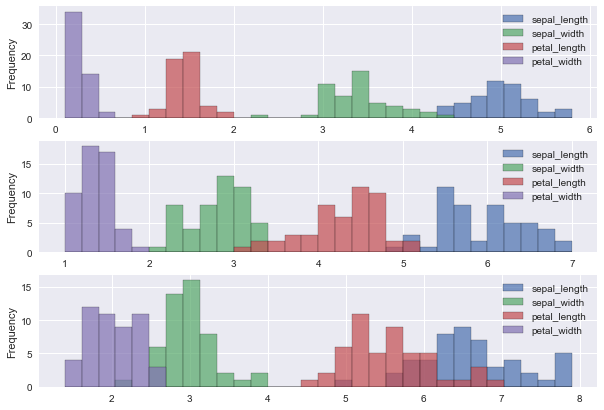

In [191]:
# Plot Histograms for each species individually
fig, axes = plt.subplots(3,1)
data.loc['setosa', :].plot(kind='hist', ax=axes[0], alpha=0.7, bins=30)
data.loc['versicolor', :].plot(kind='hist', ax=axes[1], alpha=0.7, bins=30)
data.loc['virginica', :].plot(kind='hist', ax=axes[2], alpha=0.7, bins=30)
plt.show()

Remember that ***`pd.Series.count()`*** will always give you the count of non-Null values!

Subclasses within a dataset is very important and their properties should be taken into consideration individually. For example, in the iris dataset, the stastistics of everything combined will be different from the individual classes like 'setosa', 'versicolor' and 'virginica'! 

Let's calculate the percentage errors for these species!

In [192]:
describe_all = data.describe()
describe_all

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [198]:
describe_setosa = data.loc['setosa', :].describe()
describe_versicolor = data.loc['versicolor', :].describe()
describe_virginica = data.loc['virginica', :].describe()

In [199]:
error_setosa = 100*(np.abs(describe_setosa - describe_all))/describe_setosa
error_versicolor = 100*(np.abs(describe_versicolor - describe_all))/describe_versicolor
error_virginica = 100*(np.abs(describe_virginica - describe_all))/describe_virginica

In [200]:
error_setosa

,sepal_length,sepal_width,petal_length,petal_width
count,200.000000,200.000000,200.000000,200.000000
mean,16.726595,10.649503,156.739526,391.256831
std,134.919250,13.796994,916.891608,611.840574
min,0.000000,13.043478,0.000000,0.000000
25%,6.250000,10.400000,14.285714,50.000000
50%,16.000000,11.764706,190.000000,550.000000
75%,23.076923,10.204082,223.809524,500.000000
max,36.206897,0.000000,263.157895,316.666667


In [201]:
error_versicolor

,sepal_length,sepal_width,petal_length,petal_width
count,200.000000,200.000000,200.000000,200.000000
mean,1.561096,10.252708,11.768388,9.602815
std,60.424722,38.176108,275.479720,285.916763
min,12.244898,0.000000,66.666667,90.000000
25%,8.928571,10.891089,60.000000,75.000000
50%,1.694915,7.142857,0.000000,0.000000
75%,1.587302,10.000000,10.869565,20.000000
max,12.857143,29.411765,35.294118,38.888889


In [202]:
error_virginica

,sepal_length,sepal_width,petal_length,petal_width
count,200.000000,200.000000,200.000000,200.000000
mean,11.303380,2.689980,32.300672,40.835801
std,30.223731,34.449250,219.702370,177.866589
min,12.244898,9.090909,77.777778,92.857143
25%,18.072289,0.000000,68.627451,83.333333
50%,10.769231,0.000000,21.621622,35.000000
75%,7.246377,3.937008,13.191489,21.739130
max,0.000000,15.789474,0.000000,0.000000


Therefore, petal_length and petal_width have huge errors (or deviate from the mean!) and so properties of subclasses are important.

### Indexing Pandas Time Series 

- ***`read_csv(parse_dates=True)`***
  - ISO 8601 format
  - yyyy-mm-dd hh:mm::ss
  - Apart from ISO 8601, ***`read_csv()`*** can read from many other Date Formats
  - Datetime Indices are super useful for data exploration
- Selecting Datetime indices
  - ***`data.loc['2015-02-05 11:00:00', 'column']`***
  - ***`data.loc['2015-02-05', 'column']`*** will select all entries for that date devoid of the time filter ie. all hours of the day
  - ***`data.loc['February 5, 2015', 'column']`*** will do the same thing
  - ***`data.loc['2015-Feb-5', 'column']`*** will do the same thing
  - ***`data.loc['2015-02', 'column']`*** will select everything for February 2015
  - ***`data.loc['2015', 'column']`*** will select everything for 2015
  - ***`data.loc['2015-02':'2015-05', 'column']`*** will select everything between February and May
- ***`pd.to_datetime([])`*** will convert dates in ISO 8601 format to datetime objects
  - can alter the date format with the *format8 paremeter
  - ***`pd.to_datetime(...., format='')`***
- ***`data.reindex(..., method='ffill' or 'bfill')`***
  - Reindexing is useful in preparation for adding or otherwise combining two time series data sets. To reindex the data, we provide a new index and ask pandas to try and match the old data to the new index. If data is unavailable for one of the new index dates or times, you must tell pandas how to fill it in. Otherwise, pandas will fill with NaN by default.

In [211]:
pd.to_datetime('15-02-2015', format='%d-%m-%Y') # Note that capital Y is used to pasre year

Timestamp('2015-02-15 00:00:00')

In [213]:
pd.to_datetime('15-02-15', format='%d-%m-%y') # Note that lower y is used to pasre year in this format

Timestamp('2015-02-15 00:00:00')

In [214]:
pd.to_datetime('15/02/2015', format='%d/%m/%Y')

Timestamp('2015-02-15 00:00:00')

In [215]:
pd.to_datetime('2015-01-01 091234', format='%Y-%m-%d %H%M%S')

Timestamp('2015-01-01 09:12:34')

In [218]:
pd.to_datetime('20100211 15:00', format='%Y%m%d %H:%M')

Timestamp('2010-02-11 15:00:00')

Check the *strftime() and strptime() Behavior* section table in https://docs.python.org/3/library/datetime.html

In [245]:
# ts1 has weekends and ts2 does not, reindex the second data set so that it has weekends as well, 
# and then add it to the first
ts1 = pd.Series(list(range(0,17)), index=
                ['2017-07-0'+str(x) for x in range(1,10)] + ['2017-07-'+str(y) for y in range(10,18)])
ts2 = ts1.copy()
ts2 = ts2.drop(['2017-07-02', '2017-07-03', '2017-07-09', '2017-07-10', '2017-07-16', '2017-07-17'])
print(ts1)
print(ts2)

2017-07-01     0
2017-07-02     1
2017-07-03     2
2017-07-04     3
2017-07-05     4
2017-07-06     5
2017-07-07     6
2017-07-08     7
2017-07-09     8
2017-07-10     9
2017-07-11    10
2017-07-12    11
2017-07-13    12
2017-07-14    13
2017-07-15    14
2017-07-16    15
2017-07-17    16
dtype: int64
2017-07-01     0
2017-07-04     3
2017-07-05     4
2017-07-06     5
2017-07-07     6
2017-07-08     7
2017-07-11    10
2017-07-12    11
2017-07-13    12
2017-07-14    13
2017-07-15    14
dtype: int64


In [246]:
ts3 = ts2.reindex(ts1.index)
print(ts3)

2017-07-01     0.0
2017-07-02     NaN
2017-07-03     NaN
2017-07-04     3.0
2017-07-05     4.0
2017-07-06     5.0
2017-07-07     6.0
2017-07-08     7.0
2017-07-09     NaN
2017-07-10     NaN
2017-07-11    10.0
2017-07-12    11.0
2017-07-13    12.0
2017-07-14    13.0
2017-07-15    14.0
2017-07-16     NaN
2017-07-17     NaN
dtype: float64


In [247]:
ts4 = ts2.reindex(ts1.index, method='ffill')
print(ts4)

2017-07-01     0
2017-07-02     0
2017-07-03     0
2017-07-04     3
2017-07-05     4
2017-07-06     5
2017-07-07     6
2017-07-08     7
2017-07-09     7
2017-07-10     7
2017-07-11    10
2017-07-12    11
2017-07-13    12
2017-07-14    13
2017-07-15    14
2017-07-16    14
2017-07-17    14
dtype: int64


### Resampling pandas time series (only when the Index is datetime)

- ***`df.resample('D').mean()`***
- Downsampling
  - 'D'-> Daily
  - 'W'-> Weekly
  - 'M'-> Monthly
  - '2W'-> Every 2 weeks
- usually followed with an aggregation method
- Upsampling (Daily to hourly)
  - ***`df.resample('4H').ffill()`***

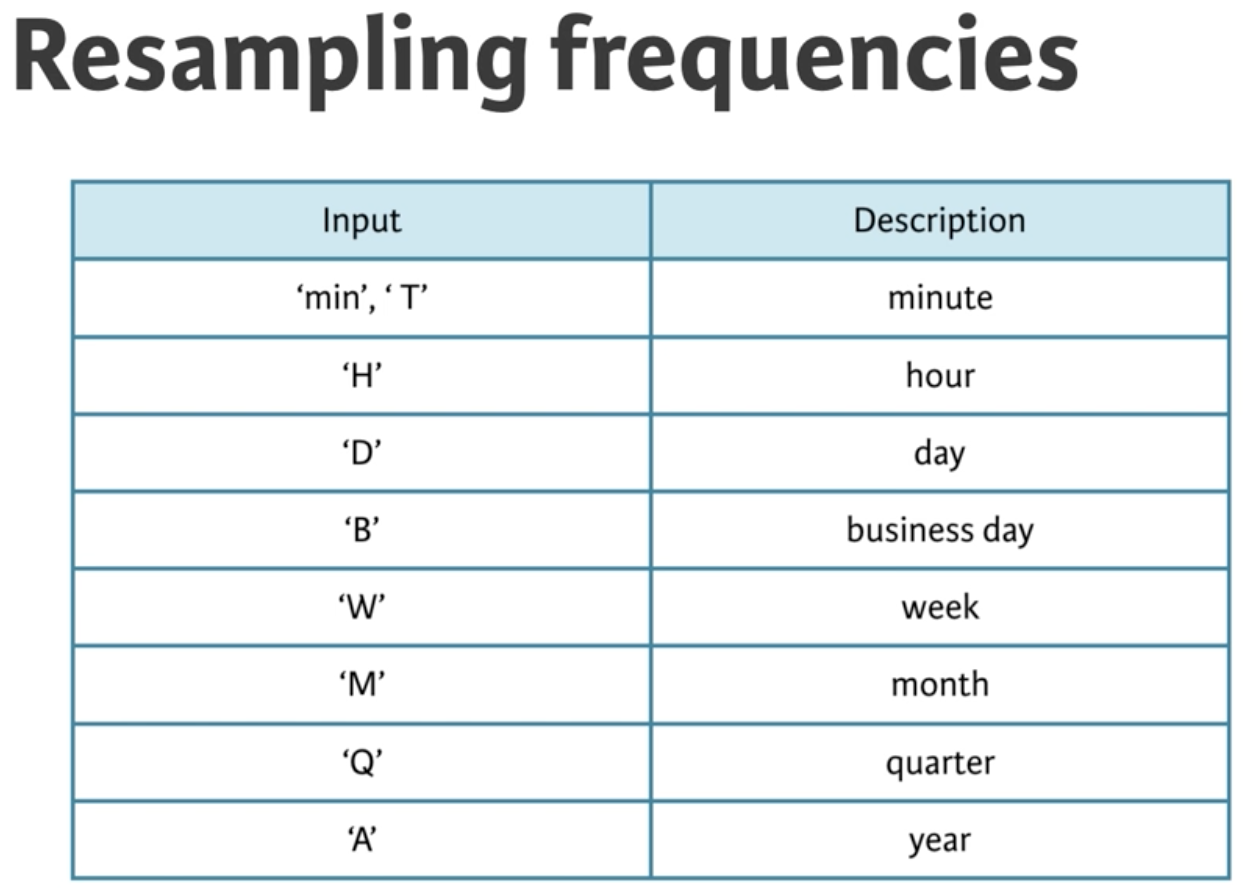

In [257]:
from IPython.display import Image
Image('resamplingf.png', width=600, height=600)

When downsampling or upsampling, the syntax is similar, but the methods called are different. Both use the concept of 'method chaining' - df.method1().method2().method3() - to direct the output from one method call to the input of the next, and so on, as a sequence of operations, one feeding into the next.

### Rolling mean and frequency

- To use the .rolling() method, you must always use method chaining, first calling .rolling() and then chaining an aggregation method after it. For example, with a Series hourly_data, hourly_data.rolling(window=24).mean() would compute new values for each hourly point, based on a 24-hour window stretching out behind each point. The frequency of the output data is the same: it is still hourly. Such an operation is useful for smoothing time series data.
- 

In [15]:
values = [ 79. ,  77.4,  76.4,  75.7,  75.1,  74.6,  74.5,  76. ,  79.8,
        83.3,  86.6,  89.3,  91.6,  93.2,  94.4,  95. ,  94.8,  93.9,
        92.4,  89.9,  86.1,  83.6,  81.8,  80. ,  79.1,  77.4,  76.5,
        75.8,  75.2,  74.6,  74.6,  76.1,  79.8,  83.3,  86.5,  89.4,
        91.6,  93.2,  94.4,  95. ,  94.8,  93.9,  92.4,  89.8,  86.1,
        83.6,  81.8,  80.1,  79.1,  77.5,  76.5,  75.8,  75.2,  74.6,
        74.5,  76. ,  79.8,  83.4,  86.6,  89.4,  91.7,  93.3,  94.5,
        95.1,  94.9,  94.1,  92.5,  89.8,  86. ,  83.5,  81.9,  80.1,
        79.2,  77.6,  76.6,  75.9,  75.3,  74.7,  74.6,  76. ,  79.9,
        83.5,  86.7,  89.5,  91.9,  93.4,  94.6,  95.1,  95. ,  94.1,
        92.5,  89.7,  86. ,  83.5,  81.9,  80.2,  79.2,  77.6,  76.6,
        75.9,  75.3,  74.7,  74.6,  76.1,  79.8,  83.4,  86.6,  89.5,
        91.9,  93.4,  94.5,  95.1,  94.9,  94.1,  92.4,  89.6,  85.9,
        83.4,  81.8,  80.1,  79.2,  77.6,  76.6,  75.9,  75.3,  74.6,
        74.6,  76. ,  79.7,  83.4,  86.6,  89.5,  91.8,  93.4,  94.5,
        95.2,  95. ,  94.1,  92.5,  89.6,  85.9,  83.4,  81.8,  80. ,
        79.2,  77.5,  76.5,  75.8,  75.2,  74.6,  74.6,  76. ,  79.7,
        83.3,  86.5,  89.4,  91.8,  93.4,  94.5,  95.3,  95. ,  94.1,
        92.4,  89.5,  85.8,  83.3,  81.7,  80. ,  79.2,  77.5,  76.5,
        75.8,  75.2,  74.6,  74.6,  75.9,  79.7,  83.3,  86.5,  89.4,
        91.7,  93.3,  94.5,  95.2,  94.9,  94.1,  92.4,  89.5,  85.7,
        83.3,  81.7,  80. ,  79.2,  77.5,  76.5,  75.8,  75.2,  74.6,
        74.6,  75.9,  79.7,  83.3,  86.4,  89.4,  91.7,  93.3,  94.5,
        95.2,  94.9,  94.1,  92.2,  89.3,  85.6,  83.2,  81.6,  79.9,
        79.1,  77.4,  76.4,  75.8,  75.2,  74.6,  74.6,  75.9,  79.6,
        83.3,  86.4,  89.4,  91.7,  93.2,  94.4,  95.1,  94.8,  94.1,
        92.3,  89.2,  85.6,  83.2,  81.6,  79.9,  79.1,  77.4,  76.5,
        75.8,  75.3,  74.7,  74.6,  75.9,  79.6,  83.3,  86.4,  89.3,
        91.7,  93.2,  94.4,  95. ,  94.7,  94. ,  92.1,  89. ,  85.5,
        83.1,  81.6,  80. ,  79.2,  77.5,  76.5,  75.8,  75.3,  74.8,
        74.7,  75.9,  79.6,  83.2,  86.4,  89.2,  91.6,  93.1,  94.4,
        94.9,  94.7,  94. ,  92.1,  89. ,  85.5,  83.2,  81.7,  80.1,
        79.2,  77.5,  76.6,  75.9,  75.4,  74.8,  74.7,  75.9,  79.6,
        83.2,  86.4,  89.3,  91.6,  93.2,  94.4,  95. ,  94.8,  94.1,
        92.3,  89.2,  85.7,  83.4,  81.7,  80.2,  79.2,  77.5,  76.5,
        75.9,  75.4,  74.9,  74.7,  75.9,  79.5,  83.1,  86.3,  89.2,
        91.5,  93.1,  94.3,  94.9,  94.7,  94. ,  92.1,  89. ,  85.6,
        83.3,  81.6,  80.1,  79.1,  77.4,  76.4,  75.8,  75.3,  74.8,
        74.7,  75.8,  79.5,  83.1,  86.2,  89.1,  91.4,  93. ,  94.2,
        94.7,  94.6,  93.9,  91.9,  88.8,  85.5,  83.3,  81.6,  80. ]

In [16]:
indices = ['2010-08-01T00:00:00.000000000', '2010-08-01T01:00:00.000000000',
       '2010-08-01T02:00:00.000000000', '2010-08-01T03:00:00.000000000',
       '2010-08-01T04:00:00.000000000', '2010-08-01T05:00:00.000000000',
       '2010-08-01T06:00:00.000000000', '2010-08-01T07:00:00.000000000',
       '2010-08-01T08:00:00.000000000', '2010-08-01T09:00:00.000000000',
       '2010-08-01T10:00:00.000000000', '2010-08-01T11:00:00.000000000',
       '2010-08-01T12:00:00.000000000', '2010-08-01T13:00:00.000000000',
       '2010-08-01T14:00:00.000000000', '2010-08-01T15:00:00.000000000',
       '2010-08-01T16:00:00.000000000', '2010-08-01T17:00:00.000000000',
       '2010-08-01T18:00:00.000000000', '2010-08-01T19:00:00.000000000',
       '2010-08-01T20:00:00.000000000', '2010-08-01T21:00:00.000000000',
       '2010-08-01T22:00:00.000000000', '2010-08-01T23:00:00.000000000',
       '2010-08-02T00:00:00.000000000', '2010-08-02T01:00:00.000000000',
       '2010-08-02T02:00:00.000000000', '2010-08-02T03:00:00.000000000',
       '2010-08-02T04:00:00.000000000', '2010-08-02T05:00:00.000000000',
       '2010-08-02T06:00:00.000000000', '2010-08-02T07:00:00.000000000',
       '2010-08-02T08:00:00.000000000', '2010-08-02T09:00:00.000000000',
       '2010-08-02T10:00:00.000000000', '2010-08-02T11:00:00.000000000',
       '2010-08-02T12:00:00.000000000', '2010-08-02T13:00:00.000000000',
       '2010-08-02T14:00:00.000000000', '2010-08-02T15:00:00.000000000',
       '2010-08-02T16:00:00.000000000', '2010-08-02T17:00:00.000000000',
       '2010-08-02T18:00:00.000000000', '2010-08-02T19:00:00.000000000',
       '2010-08-02T20:00:00.000000000', '2010-08-02T21:00:00.000000000',
       '2010-08-02T22:00:00.000000000', '2010-08-02T23:00:00.000000000',
       '2010-08-03T00:00:00.000000000', '2010-08-03T01:00:00.000000000',
       '2010-08-03T02:00:00.000000000', '2010-08-03T03:00:00.000000000',
       '2010-08-03T04:00:00.000000000', '2010-08-03T05:00:00.000000000',
       '2010-08-03T06:00:00.000000000', '2010-08-03T07:00:00.000000000',
       '2010-08-03T08:00:00.000000000', '2010-08-03T09:00:00.000000000',
       '2010-08-03T10:00:00.000000000', '2010-08-03T11:00:00.000000000',
       '2010-08-03T12:00:00.000000000', '2010-08-03T13:00:00.000000000',
       '2010-08-03T14:00:00.000000000', '2010-08-03T15:00:00.000000000',
       '2010-08-03T16:00:00.000000000', '2010-08-03T17:00:00.000000000',
       '2010-08-03T18:00:00.000000000', '2010-08-03T19:00:00.000000000',
       '2010-08-03T20:00:00.000000000', '2010-08-03T21:00:00.000000000',
       '2010-08-03T22:00:00.000000000', '2010-08-03T23:00:00.000000000',
       '2010-08-04T00:00:00.000000000', '2010-08-04T01:00:00.000000000',
       '2010-08-04T02:00:00.000000000', '2010-08-04T03:00:00.000000000',
       '2010-08-04T04:00:00.000000000', '2010-08-04T05:00:00.000000000',
       '2010-08-04T06:00:00.000000000', '2010-08-04T07:00:00.000000000',
       '2010-08-04T08:00:00.000000000', '2010-08-04T09:00:00.000000000',
       '2010-08-04T10:00:00.000000000', '2010-08-04T11:00:00.000000000',
       '2010-08-04T12:00:00.000000000', '2010-08-04T13:00:00.000000000',
       '2010-08-04T14:00:00.000000000', '2010-08-04T15:00:00.000000000',
       '2010-08-04T16:00:00.000000000', '2010-08-04T17:00:00.000000000',
       '2010-08-04T18:00:00.000000000', '2010-08-04T19:00:00.000000000',
       '2010-08-04T20:00:00.000000000', '2010-08-04T21:00:00.000000000',
       '2010-08-04T22:00:00.000000000', '2010-08-04T23:00:00.000000000',
       '2010-08-05T00:00:00.000000000', '2010-08-05T01:00:00.000000000',
       '2010-08-05T02:00:00.000000000', '2010-08-05T03:00:00.000000000',
       '2010-08-05T04:00:00.000000000', '2010-08-05T05:00:00.000000000',
       '2010-08-05T06:00:00.000000000', '2010-08-05T07:00:00.000000000',
       '2010-08-05T08:00:00.000000000', '2010-08-05T09:00:00.000000000',
       '2010-08-05T10:00:00.000000000', '2010-08-05T11:00:00.000000000',
       '2010-08-05T12:00:00.000000000', '2010-08-05T13:00:00.000000000',
       '2010-08-05T14:00:00.000000000', '2010-08-05T15:00:00.000000000',
       '2010-08-05T16:00:00.000000000', '2010-08-05T17:00:00.000000000',
       '2010-08-05T18:00:00.000000000', '2010-08-05T19:00:00.000000000',
       '2010-08-05T20:00:00.000000000', '2010-08-05T21:00:00.000000000',
       '2010-08-05T22:00:00.000000000', '2010-08-05T23:00:00.000000000',
       '2010-08-06T00:00:00.000000000', '2010-08-06T01:00:00.000000000',
       '2010-08-06T02:00:00.000000000', '2010-08-06T03:00:00.000000000',
       '2010-08-06T04:00:00.000000000', '2010-08-06T05:00:00.000000000',
       '2010-08-06T06:00:00.000000000', '2010-08-06T07:00:00.000000000',
       '2010-08-06T08:00:00.000000000', '2010-08-06T09:00:00.000000000',
       '2010-08-06T10:00:00.000000000', '2010-08-06T11:00:00.000000000',
       '2010-08-06T12:00:00.000000000', '2010-08-06T13:00:00.000000000',
       '2010-08-06T14:00:00.000000000', '2010-08-06T15:00:00.000000000',
       '2010-08-06T16:00:00.000000000', '2010-08-06T17:00:00.000000000',
       '2010-08-06T18:00:00.000000000', '2010-08-06T19:00:00.000000000',
       '2010-08-06T20:00:00.000000000', '2010-08-06T21:00:00.000000000',
       '2010-08-06T22:00:00.000000000', '2010-08-06T23:00:00.000000000',
       '2010-08-07T00:00:00.000000000', '2010-08-07T01:00:00.000000000',
       '2010-08-07T02:00:00.000000000', '2010-08-07T03:00:00.000000000',
       '2010-08-07T04:00:00.000000000', '2010-08-07T05:00:00.000000000',
       '2010-08-07T06:00:00.000000000', '2010-08-07T07:00:00.000000000',
       '2010-08-07T08:00:00.000000000', '2010-08-07T09:00:00.000000000',
       '2010-08-07T10:00:00.000000000', '2010-08-07T11:00:00.000000000',
       '2010-08-07T12:00:00.000000000', '2010-08-07T13:00:00.000000000',
       '2010-08-07T14:00:00.000000000', '2010-08-07T15:00:00.000000000',
       '2010-08-07T16:00:00.000000000', '2010-08-07T17:00:00.000000000',
       '2010-08-07T18:00:00.000000000', '2010-08-07T19:00:00.000000000',
       '2010-08-07T20:00:00.000000000', '2010-08-07T21:00:00.000000000',
       '2010-08-07T22:00:00.000000000', '2010-08-07T23:00:00.000000000',
       '2010-08-08T00:00:00.000000000', '2010-08-08T01:00:00.000000000',
       '2010-08-08T02:00:00.000000000', '2010-08-08T03:00:00.000000000',
       '2010-08-08T04:00:00.000000000', '2010-08-08T05:00:00.000000000',
       '2010-08-08T06:00:00.000000000', '2010-08-08T07:00:00.000000000',
       '2010-08-08T08:00:00.000000000', '2010-08-08T09:00:00.000000000',
       '2010-08-08T10:00:00.000000000', '2010-08-08T11:00:00.000000000',
       '2010-08-08T12:00:00.000000000', '2010-08-08T13:00:00.000000000',
       '2010-08-08T14:00:00.000000000', '2010-08-08T15:00:00.000000000',
       '2010-08-08T16:00:00.000000000', '2010-08-08T17:00:00.000000000',
       '2010-08-08T18:00:00.000000000', '2010-08-08T19:00:00.000000000',
       '2010-08-08T20:00:00.000000000', '2010-08-08T21:00:00.000000000',
       '2010-08-08T22:00:00.000000000', '2010-08-08T23:00:00.000000000',
       '2010-08-09T00:00:00.000000000', '2010-08-09T01:00:00.000000000',
       '2010-08-09T02:00:00.000000000', '2010-08-09T03:00:00.000000000',
       '2010-08-09T04:00:00.000000000', '2010-08-09T05:00:00.000000000',
       '2010-08-09T06:00:00.000000000', '2010-08-09T07:00:00.000000000',
       '2010-08-09T08:00:00.000000000', '2010-08-09T09:00:00.000000000',
       '2010-08-09T10:00:00.000000000', '2010-08-09T11:00:00.000000000',
       '2010-08-09T12:00:00.000000000', '2010-08-09T13:00:00.000000000',
       '2010-08-09T14:00:00.000000000', '2010-08-09T15:00:00.000000000',
       '2010-08-09T16:00:00.000000000', '2010-08-09T17:00:00.000000000',
       '2010-08-09T18:00:00.000000000', '2010-08-09T19:00:00.000000000',
       '2010-08-09T20:00:00.000000000', '2010-08-09T21:00:00.000000000',
       '2010-08-09T22:00:00.000000000', '2010-08-09T23:00:00.000000000',
       '2010-08-10T00:00:00.000000000', '2010-08-10T01:00:00.000000000',
       '2010-08-10T02:00:00.000000000', '2010-08-10T03:00:00.000000000',
       '2010-08-10T04:00:00.000000000', '2010-08-10T05:00:00.000000000',
       '2010-08-10T06:00:00.000000000', '2010-08-10T07:00:00.000000000',
       '2010-08-10T08:00:00.000000000', '2010-08-10T09:00:00.000000000',
       '2010-08-10T10:00:00.000000000', '2010-08-10T11:00:00.000000000',
       '2010-08-10T12:00:00.000000000', '2010-08-10T13:00:00.000000000',
       '2010-08-10T14:00:00.000000000', '2010-08-10T15:00:00.000000000',
       '2010-08-10T16:00:00.000000000', '2010-08-10T17:00:00.000000000',
       '2010-08-10T18:00:00.000000000', '2010-08-10T19:00:00.000000000',
       '2010-08-10T20:00:00.000000000', '2010-08-10T21:00:00.000000000',
       '2010-08-10T22:00:00.000000000', '2010-08-10T23:00:00.000000000',
       '2010-08-11T00:00:00.000000000', '2010-08-11T01:00:00.000000000',
       '2010-08-11T02:00:00.000000000', '2010-08-11T03:00:00.000000000',
       '2010-08-11T04:00:00.000000000', '2010-08-11T05:00:00.000000000',
       '2010-08-11T06:00:00.000000000', '2010-08-11T07:00:00.000000000',
       '2010-08-11T08:00:00.000000000', '2010-08-11T09:00:00.000000000',
       '2010-08-11T10:00:00.000000000', '2010-08-11T11:00:00.000000000',
       '2010-08-11T12:00:00.000000000', '2010-08-11T13:00:00.000000000',
       '2010-08-11T14:00:00.000000000', '2010-08-11T15:00:00.000000000',
       '2010-08-11T16:00:00.000000000', '2010-08-11T17:00:00.000000000',
       '2010-08-11T18:00:00.000000000', '2010-08-11T19:00:00.000000000',
       '2010-08-11T20:00:00.000000000', '2010-08-11T21:00:00.000000000',
       '2010-08-11T22:00:00.000000000', '2010-08-11T23:00:00.000000000',
       '2010-08-12T00:00:00.000000000', '2010-08-12T01:00:00.000000000',
       '2010-08-12T02:00:00.000000000', '2010-08-12T03:00:00.000000000',
       '2010-08-12T04:00:00.000000000', '2010-08-12T05:00:00.000000000',
       '2010-08-12T06:00:00.000000000', '2010-08-12T07:00:00.000000000',
       '2010-08-12T08:00:00.000000000', '2010-08-12T09:00:00.000000000',
       '2010-08-12T10:00:00.000000000', '2010-08-12T11:00:00.000000000',
       '2010-08-12T12:00:00.000000000', '2010-08-12T13:00:00.000000000',
       '2010-08-12T14:00:00.000000000', '2010-08-12T15:00:00.000000000',
       '2010-08-12T16:00:00.000000000', '2010-08-12T17:00:00.000000000',
       '2010-08-12T18:00:00.000000000', '2010-08-12T19:00:00.000000000',
       '2010-08-12T20:00:00.000000000', '2010-08-12T21:00:00.000000000',
       '2010-08-12T22:00:00.000000000', '2010-08-12T23:00:00.000000000',
       '2010-08-13T00:00:00.000000000', '2010-08-13T01:00:00.000000000',
       '2010-08-13T02:00:00.000000000', '2010-08-13T03:00:00.000000000',
       '2010-08-13T04:00:00.000000000', '2010-08-13T05:00:00.000000000',
       '2010-08-13T06:00:00.000000000', '2010-08-13T07:00:00.000000000',
       '2010-08-13T08:00:00.000000000', '2010-08-13T09:00:00.000000000',
       '2010-08-13T10:00:00.000000000', '2010-08-13T11:00:00.000000000',
       '2010-08-13T12:00:00.000000000', '2010-08-13T13:00:00.000000000',
       '2010-08-13T14:00:00.000000000', '2010-08-13T15:00:00.000000000',
       '2010-08-13T16:00:00.000000000', '2010-08-13T17:00:00.000000000',
       '2010-08-13T18:00:00.000000000', '2010-08-13T19:00:00.000000000',
       '2010-08-13T20:00:00.000000000', '2010-08-13T21:00:00.000000000',
       '2010-08-13T22:00:00.000000000', '2010-08-13T23:00:00.000000000',
       '2010-08-14T00:00:00.000000000', '2010-08-14T01:00:00.000000000',
       '2010-08-14T02:00:00.000000000', '2010-08-14T03:00:00.000000000',
       '2010-08-14T04:00:00.000000000', '2010-08-14T05:00:00.000000000',
       '2010-08-14T06:00:00.000000000', '2010-08-14T07:00:00.000000000',
       '2010-08-14T08:00:00.000000000', '2010-08-14T09:00:00.000000000',
       '2010-08-14T10:00:00.000000000', '2010-08-14T11:00:00.000000000',
       '2010-08-14T12:00:00.000000000', '2010-08-14T13:00:00.000000000',
       '2010-08-14T14:00:00.000000000', '2010-08-14T15:00:00.000000000',
       '2010-08-14T16:00:00.000000000', '2010-08-14T17:00:00.000000000',
       '2010-08-14T18:00:00.000000000', '2010-08-14T19:00:00.000000000',
       '2010-08-14T20:00:00.000000000', '2010-08-14T21:00:00.000000000',
       '2010-08-14T22:00:00.000000000', '2010-08-14T23:00:00.000000000',
       '2010-08-15T00:00:00.000000000', '2010-08-15T01:00:00.000000000',
       '2010-08-15T02:00:00.000000000', '2010-08-15T03:00:00.000000000',
       '2010-08-15T04:00:00.000000000', '2010-08-15T05:00:00.000000000',
       '2010-08-15T06:00:00.000000000', '2010-08-15T07:00:00.000000000',
       '2010-08-15T08:00:00.000000000', '2010-08-15T09:00:00.000000000',
       '2010-08-15T10:00:00.000000000', '2010-08-15T11:00:00.000000000',
       '2010-08-15T12:00:00.000000000', '2010-08-15T13:00:00.000000000',
       '2010-08-15T14:00:00.000000000', '2010-08-15T15:00:00.000000000',
       '2010-08-15T16:00:00.000000000', '2010-08-15T17:00:00.000000000',
       '2010-08-15T18:00:00.000000000', '2010-08-15T19:00:00.000000000',
       '2010-08-15T20:00:00.000000000', '2010-08-15T21:00:00.000000000',
       '2010-08-15T22:00:00.000000000', '2010-08-15T23:00:00.000000000']

In [17]:
df = pd.Series(values, index=pd.to_datetime(indices))
df.head()

2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
dtype: float64

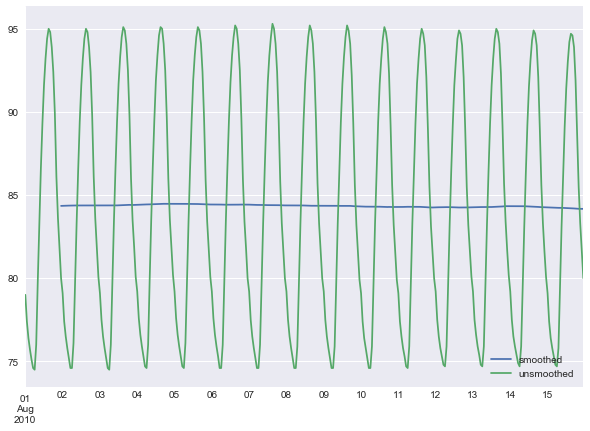

In [268]:
# Apply a rolling mean with a 24 hour window and plot it comparing against the raw data
smoothed = df.rolling(window=24).mean()
unsmoothed = df.copy()
dt = {
    'smoothed': smoothed,
    'unsmoothed': unsmoothed
}
pd.DataFrame(dt).plot()
plt.show()

Note that here the data was already hourly. If not then you'd resample('H').mean() and then apply rolling so something like ***`df.resample('H').mean().rolling(window=24).mean()`***

### String Manipulation

- ***`df['column'].str.upper()`***
- ***`df['column'].str.contains('string')`***
- ***`df['column'].str.contains('string').sum()`*** # becasue True = 1 and False - 0 in Python
- ***`df['column'].dt.hour`***
- ***`df['column'].dt.tz_localize('US/Central')`*** # to convert timezones
- ***`df['column'].dt.tz_localize('US/Central').dt.tz_convert('US/Central')`*** # to then convert to the the specific local timezone
- Interpolate missing data
  - ***`df.resample('A').first().interpolate('linear')`*** # if df was say a 10 yearly data series

In [269]:
# ts1 has weekends and ts2 does not, reindex the second data set so that it has weekends as well, 
# and then add it to the first
ts1 = pd.Series(list(range(0,17)), index=
                ['2017-07-0'+str(x) for x in range(1,10)] + ['2017-07-'+str(y) for y in range(10,18)])
ts2 = ts1.copy()
ts2 = ts2.drop(['2017-07-02', '2017-07-03', '2017-07-09', '2017-07-10', '2017-07-16', '2017-07-17'])
print(ts1)
print(ts2)

2017-07-01     0
2017-07-02     1
2017-07-03     2
2017-07-04     3
2017-07-05     4
2017-07-06     5
2017-07-07     6
2017-07-08     7
2017-07-09     8
2017-07-10     9
2017-07-11    10
2017-07-12    11
2017-07-13    12
2017-07-14    13
2017-07-15    14
2017-07-16    15
2017-07-17    16
dtype: int64
2017-07-01     0
2017-07-04     3
2017-07-05     4
2017-07-06     5
2017-07-07     6
2017-07-08     7
2017-07-11    10
2017-07-12    11
2017-07-13    12
2017-07-14    13
2017-07-15    14
dtype: int64


In [270]:
# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2.reindex(ts1.index).interpolate('linear')
print(ts2_interp)

2017-07-01     0.0
2017-07-02     1.0
2017-07-03     2.0
2017-07-04     3.0
2017-07-05     4.0
2017-07-06     5.0
2017-07-07     6.0
2017-07-08     7.0
2017-07-09     8.0
2017-07-10     9.0
2017-07-11    10.0
2017-07-12    11.0
2017-07-13    12.0
2017-07-14    13.0
2017-07-15    14.0
2017-07-16    14.0
2017-07-17    14.0
dtype: float64


Note we could also have done ***`ts2.reindex(ts1.index).interpolate('linear', method=''ffill')`*** as an alternative but that wouldn't be linear.

In [4]:
df = pd.read_csv('all_stocks_5yr.csv', parse_dates=True, index_col='Date')
# Downloaded from https://www.kaggle.com/camnugent/sandp500/data
df.head(10)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM
2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM
2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM
2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM
2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM
2012-08-20,94.00,94.17,93.55,93.89,1640008.0,MMM
2012-08-21,93.98,94.10,92.99,93.21,2302988.0,MMM
2012-08-22,92.56,93.36,92.43,92.68,2463908.0,MMM
2012-08-23,92.65,92.68,91.79,91.98,1823757.0,MMM


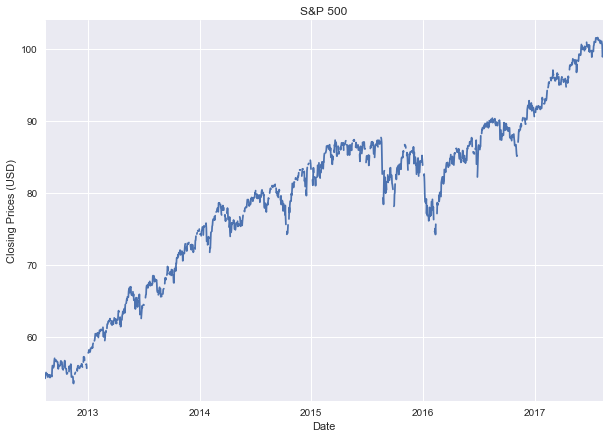

In [292]:
df.resample('D').mean()['Close'].plot(kind='line')
plt.title('S&P 500')
plt.ylabel('Closing Prices (USD)')
plt.show()

***`style='char1, char2, char3'`*** parameter in plot!

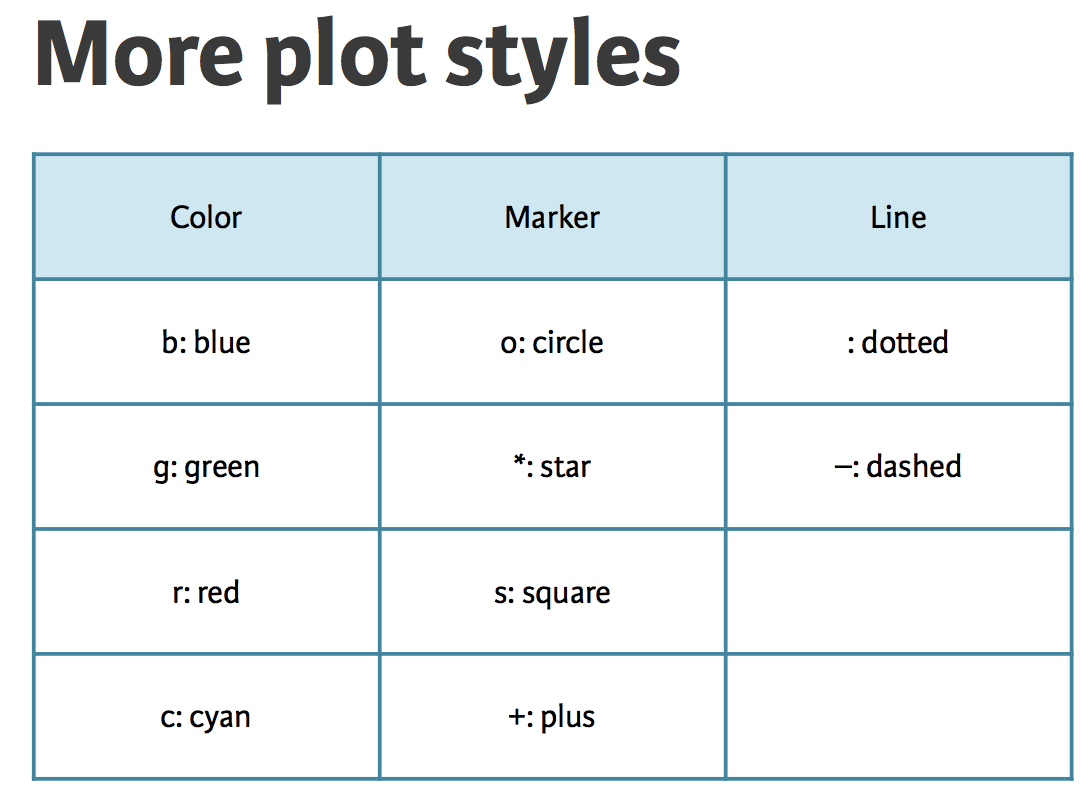

In [294]:
Image('plotstyles.png', width=400, height=400)

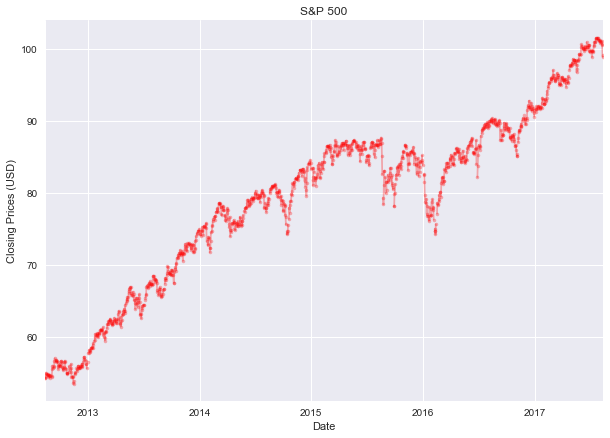

In [303]:
# Change the style of the above plot
df.resample('D').mean()['Close'].plot(kind='line', style='r.-', alpha=0.3)
plt.title('S&P 500')
plt.ylabel('Closing Prices (USD)')
plt.show()

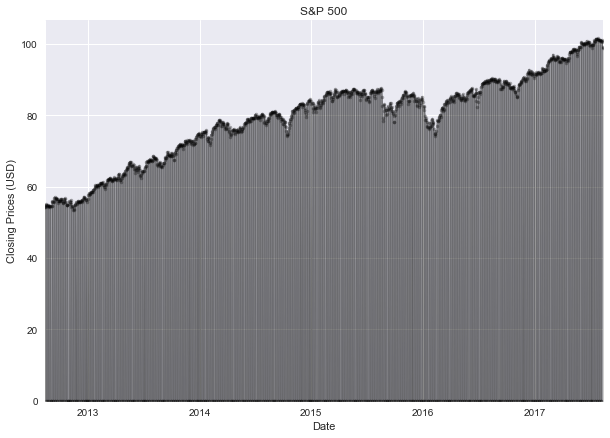

In [305]:
# Area Plot
df.resample('D').mean()['Close'].plot(kind='area', style='k.-', alpha=0.3)
plt.title('S&P 500')
plt.ylabel('Closing Prices (USD)')
plt.show()

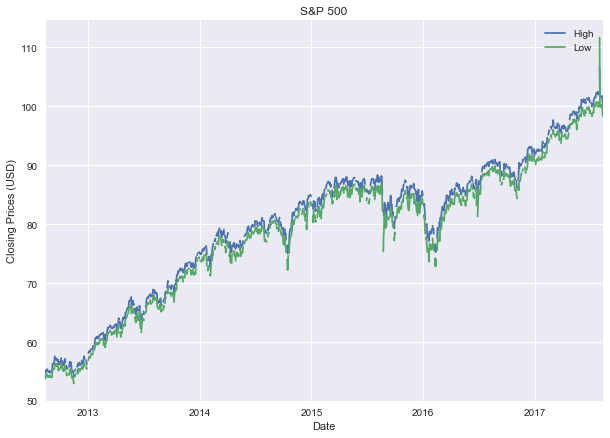

In [312]:
# Plot the above with the mean Highest and Lowest prices
df.resample('D').mean().plot(y=['High', 'Low'])
plt.title('S&P 500')
plt.ylabel('Closing Prices (USD)')
plt.show()

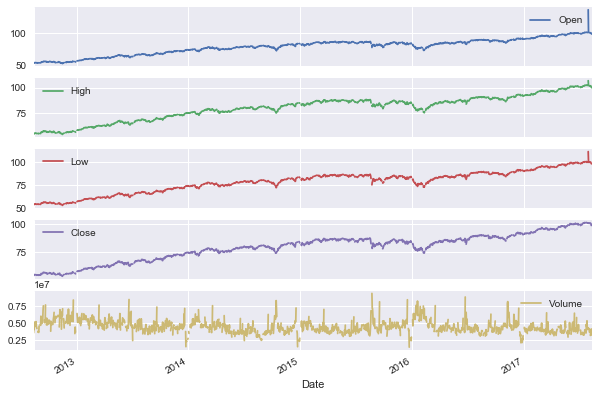

In [318]:
df.resample('D').mean().plot(subplots=True)
plt.show()

If df in hourly, ***`df.index.hour`*** will give you nth hour!

***`df.index.minute`*** and ***`df.index.day`*** for their corresponding stuff. You can store this as a new column in a DataFrame to do aggregations!

In [72]:
df.head()

2010-08-01 00:00:00      79
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
dtype: object

In [73]:
df.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', length=360)

In [75]:
df.index.minute

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', length=360)

In [76]:
df.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
           dtype='int64', length=360)

***`x.dt.hour`***, ***`x.dt.day`***, ***`x.dt.date`*** etc. can only be used for Datetime Series objects!

In [95]:
x = pd.to_datetime(pd.Series(['2017-12-01 01:00', '2017-12-01 02:00']))
x

0   2017-12-01 01:00:00
1   2017-12-01 02:00:00
dtype: datetime64[ns]

In [96]:
x.dt.hour

0    1
1    2
dtype: int64

In [97]:
x.dt.day

0    1
1    1
dtype: int64

In [98]:
x.dt.time

0    01:00:00
1    02:00:00
dtype: object

In [99]:
x.dt.date

0    2017-12-01
1    2017-12-01
dtype: object

#### Clean up some data as an exercise!

In [107]:
dt = {'Time': {0: 53,
  1: 153,
  2: 253,
  3: 353,
  4: 453,
  5: 553,
  6: 653,
  7: 753,
  8: 853,
  9: 953},
 'date': {0: 20110101,
  1: 20110101,
  2: 20110101,
  3: 20110101,
  4: 20110101,
  5: 20110101,
  6: 20110101,
  7: 20110101,
  8: 20110101,
  9: 20110101},
 'relative_humidity': {0: ' 24',
  1: ' 23',
  2: ' 22',
  3: ' 27',
  4: ' 25',
  5: ' 28',
  6: ' 29',
  7: ' 29',
  8: ' 25',
  9: ' 22'}}

df = pd.DataFrame(dt)
df.columns = ['time','date','rel_hum']
df = df[['date','time','rel_hum']]
df

,date,time,rel_hum
0,20110101,53,24
1,20110101,153,23
2,20110101,253,22
3,20110101,353,27
4,20110101,453,25
5,20110101,553,28
6,20110101,653,29
7,20110101,753,29
8,20110101,853,25
9,20110101,953,22


In [112]:
df.dtypes

date        int64
time        int64
rel_hum    object
dtype: object

In [122]:
# We need to add relevant zeroes to the time column!
def convert_to_format(time):
    a = str(time)
    p = len(a)
    diff = 4 - p
    time_concat = '0'*diff + a
    return time_concat

df['time'] = df['time'].apply(convert_to_format).astype(str)
df

,date,time,rel_hum
0,20110101,0053,24
1,20110101,0153,23
2,20110101,0253,22
3,20110101,0353,27
4,20110101,0453,25
5,20110101,0553,28
6,20110101,0653,29
7,20110101,0753,29
8,20110101,0853,25
9,20110101,0953,22


In [125]:
df.index = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str), format='%Y%m%d %H%M')
df

,date,time,rel_hum
2011-01-01 00:53:00,20110101,0053,24
2011-01-01 01:53:00,20110101,0153,23
2011-01-01 02:53:00,20110101,0253,22
2011-01-01 03:53:00,20110101,0353,27
2011-01-01 04:53:00,20110101,0453,25
2011-01-01 05:53:00,20110101,0553,28
2011-01-01 06:53:00,20110101,0653,29
2011-01-01 07:53:00,20110101,0753,29
2011-01-01 08:53:00,20110101,0853,25
2011-01-01 09:53:00,20110101,0953,22


In [127]:
df.drop(['date', 'time'], axis=1, inplace=True)
df

,rel_hum
2011-01-01 00:53:00,24
2011-01-01 01:53:00,23
2011-01-01 02:53:00,22
2011-01-01 03:53:00,27
2011-01-01 04:53:00,25
2011-01-01 05:53:00,28
2011-01-01 06:53:00,29
2011-01-01 07:53:00,29
2011-01-01 08:53:00,25
2011-01-01 09:53:00,22


In [129]:
df['rel_hum'] = df['rel_hum'].astype(float)
df.resample('H').mean()

,rel_hum
2011-01-01 00:00:00,24.0
2011-01-01 01:00:00,23.0
2011-01-01 02:00:00,22.0
2011-01-01 03:00:00,27.0
2011-01-01 04:00:00,25.0
2011-01-01 05:00:00,28.0
2011-01-01 06:00:00,29.0
2011-01-01 07:00:00,29.0
2011-01-01 08:00:00,25.0
2011-01-01 09:00:00,22.0


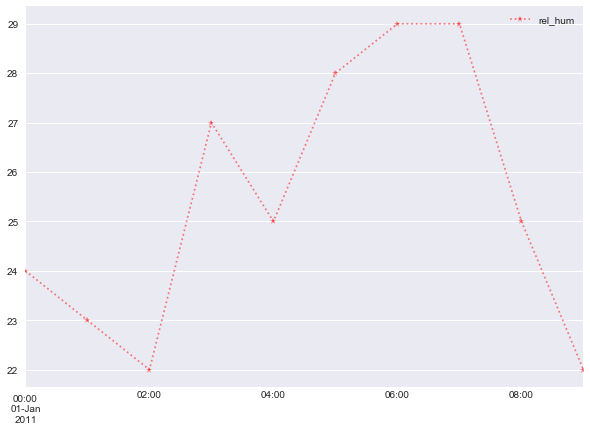

In [136]:
df.resample('H').mean().plot(style='r*:', alpha=0.5)
plt.show()

The numeric columns contain missing values labeled as 'M'. In this exercise, your job is to transform these columns such that they contain only numeric values and interpret missing data as NaN.

The pandas function pd.to_numeric() is ideal for this purpose: It converts a Series of values to floating-point values. Furthermore, by specifying the keyword argument errors='coerce', you can force strings like 'M' to be interpreted as NaN.

In [137]:
dt = {
    'A': [1,'Blah',3, 'M',5],
    'B': list(range(5,10))
}
df = pd.DataFrame(dt)
df

,A,B
0,1,5
1,Blah,6
2,3,7
3,M,8
4,5,9


In [140]:
df['A'] = pd.to_numeric(df['A'], errors='coerce')
df

,A,B
0,1.0,5
1,NaN,6
2,3.0,7
3,NaN,8
4,5.0,9


In [148]:
dt = {
    'A': ['group_1' for x in range(13)] + ['group_2' for y in range(12)],
    'B': list(range(50,100,2))
}
df = pd.DataFrame(dt)
df

,A,B
0,group_1,50
1,group_1,52
2,group_1,54
3,group_1,56
4,group_1,58
5,group_1,60
6,group_1,62
7,group_1,64
8,group_1,66
9,group_1,68


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


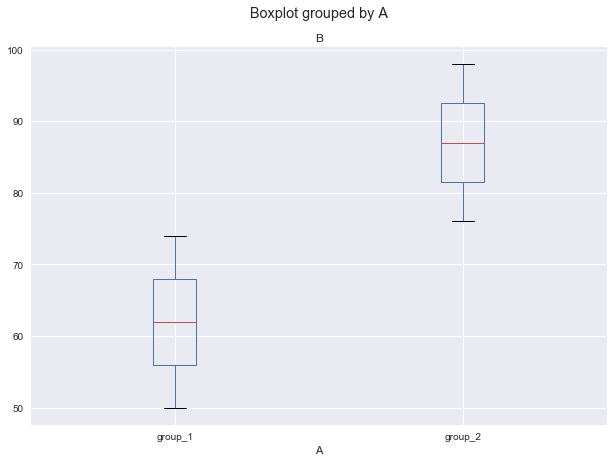

In [151]:
df.boxplot(column='B', by='A')
plt.show()

In addition to creating the subplots, you will compute the Pearson correlation coefficient using .corr(). The Pearson correlation coefficient, known also as Pearson's r, ranges from -1 (indicating total negative linear correlation) to 1 (indicating total positive linear correlation). A value close to 1 here would indicate that there is a strong correlation between temperature and visibility.

In [155]:
dt1 = [[  9.47705314,  73.11111111],
       [  9.62365591,  68.88172043],
       [  9.96685083,  53.48618785],
       [  9.65384615,  82.14354067],
       [  9.86170213,  63.53723404],
       [  9.97701149,  79.20689655],
       [  9.24264706,  38.23529412],
       [ 10.        ,  88.51234568],
       [  8.37085308,  47.1943128 ],
       [  9.94029851,  84.99004975],
       [  9.79558011,  57.70718232],
       [ 10.        ,  85.98378378],
       [  7.51066351,  65.33649289],
       [  7.71363636,  50.12727273],
       [  8.78414634,  63.4097561 ],
       [  9.06976744,  71.20930233],
       [  9.28176796,  40.08287293],
       [  6.45165094,  41.10377358],
       [  8.9625    ,  75.705     ],
       [  9.55172414,  66.98275862]]
df1 = pd.DataFrame(dt1, columns=['A','B'])
df1

,A,B
0,9.477053,73.111111
1,9.623656,68.881720
2,9.966851,53.486188
3,9.653846,82.143541
4,9.861702,63.537234
5,9.977011,79.206897
6,9.242647,38.235294
7,10.000000,88.512346
8,8.370853,47.194313
9,9.940299,84.990050


In [156]:
df1.corr()

,A,B
A,1.000000,0.532668
B,0.532668,1.000000
